<a href="https://colab.research.google.com/github/AbinReji07/placement_status-project/blob/main/placement_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**
This dataset contains detailed academic and co-curricular information of 10,000 students, aimed at understanding the various factors influencing student placements. The data encompasses academic performance indicators like CGPA, SSC and HSC marks, as well as other attributes such as internship experience, number of projects, certifications, aptitude scores, soft skills ratings, extracurricular participation, and placement training. The final placement status of each student is also included, making this dataset highly suitable for predictive analysis and decision support in educational institutions.





# **AIM**
The aim of this dataset is to analyze and identify the key academic and non-academic factors that influence student placement outcomes. By examining variables such as CGPA, internship experience, projects, certifications, aptitude scores, and soft skills, the dataset supports the development of predictive models and strategic insights to enhance student employability and improve placement preparation programs.

# **OVERVIEW**





*   	CGPA - It is the overall grades achieved by the student.

*  	Internships - It tells the number of internships a student has done.
*   Projects - Number of projects a student has done.

*  Workshops/Certifications - As there are multiple courses available online student opt for them to upskill themselves.

*   ApptitudeTestScore - Aptitude test are generally a part of the recruitment process to understand the Quant and logical thinking of the student.
*   SoftSkillrating - Communication is a key role that plays in the placement or in any aspect of the life.

*  	ExtraCurricularActivities - This helps provide and insight about the personality of an individual regarding how much he is active other than the academic.
*  PlacementTraining - It is provided to students in college to ace the placement process.



* 	SSC and HSC - Senior Secondary and Higher Secondary Marks.
*  	PlacementStatus - This is our target column with two classes placed and not placed.








In [1]:
import pandas as pd
df=pd.read_csv("/content/placementdata.csv")
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


# **PREPROCESSING STEPS**


*  **Data Cleaning:** Removing or correcting invalid, inconsistent, or duplicate data to ensure dataset quality.

* **Missing Values Handling:** Checking and filling missing data using techniques like mean, median, mode.

*   **Datatype Check:**

  •	Ensuring all columns have correct data types (e.g., converting strings to categorical, integers, or floats as needed).

  •	Using technique like labelencoder and mapping


*  **Split Data (Input/Output):**
    
   •	Separating features (X) and target label (y) for model training.

   •	Dropping unnecessary columns like StudentID which do not contribute to prediction.



*   **Balancing Data:** To create a balanced dataset, so the model gives equal attention to all classes and doesn't simply predict the most frequent outcome. (e.g., using oversampling (SMOTE) or undersampling (randomundersampler) method)


*  **Scaling:** To ensure all features contribute equally to the learning process and speed up model convergence.(standard scaler, min-max scaler)


*  **Train-Test Split:** Splitting the dataset into training and testing subsets (e.g., 70% train, 30% test) to evaluate model performance on unseen data.






 **missing values-** there are no missing values in the dataset

In [2]:
df.isna().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


**data type  :**

> "In this dataset, three columns contain object (string) values, which are converted into integer values using Label Encoding."




In [3]:
df.dtypes

,0
StudentID,int64
CGPA,float64
Internships,int64
Projects,int64
Workshops/Certifications,int64
AptitudeTestScore,int64
SoftSkillsRating,float64
ExtracurricularActivities,object
PlacementTraining,object
SSC_Marks,int64


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["ExtracurricularActivities"]=le.fit_transform(df["ExtracurricularActivities"])
df["PlacementTraining"]=le.fit_transform(df["PlacementTraining"])
df["PlacementStatus"]=le.fit_transform(df["PlacementStatus"])

In [5]:
df.dtypes

,0
StudentID,int64
CGPA,float64
Internships,int64
Projects,int64
Workshops/Certifications,int64
AptitudeTestScore,int64
SoftSkillsRating,float64
ExtracurricularActivities,int64
PlacementTraining,int64
SSC_Marks,int64


**split data set-** "The dataset is split into input features (X) and the target variable (y). Unnecessary columns, such as StudentID, are removed during this process."

In [6]:
x=df.iloc[:,1:-1]
x

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66
9996,7.4,0,1,0,90,4.8,0,0,84,67
9997,8.4,1,3,0,70,4.8,1,1,79,81
9998,8.9,0,3,2,87,4.8,1,1,71,85


In [7]:
y=df.iloc[:,-1]
y

,PlacementStatus
0,0
1,1
2,0
3,1
4,1
...,...
9995,0
9996,1
9997,1
9998,1


 **balancing the data** - The target variable in the dataset is imbalanced, so techniques such as oversampling or undersampling are applied to balance the classes and improve model performance.

In [8]:
y.value_counts()

,count
PlacementStatus,
0,5803
1,4197


In [9]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(random_state=1)
x_os,y_os=oversample.fit_resample(x,y)

In [10]:
y_os.value_counts()

,count
PlacementStatus,
0,5803
1,5803


**Scaling –** Feature scaling is applied to standardize the numerical values, ensuring all features contribute equally to the model and improving training efficiency.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_os)
x_scaled

array([[-0.38833932, -0.08742504, -1.24874988, ..., -1.72867468,
        -0.85872955,  0.42666658],
       [ 1.83407914, -1.5730107 ,  1.06273195, ...,  0.57847784,
         0.77414848,  0.76319423],
       [-0.70582768, -0.08742504, -0.09300896, ..., -1.72867468,
         0.87020013,  0.53884246],
       ...,
       [-1.15910129, -0.08742504,  1.06273195, ...,  0.57847784,
         0.38994189, -0.13421285],
       [ 0.36445877, -0.08742504,  1.06273195, ...,  0.57847784,
         0.48599354,  1.09972189],
       [ 1.58810748,  1.39816062,  1.06273195, ...,  0.57847784,
         0.77414848,  0.987546  ]])

 **Training Data –** The dataset is split into training and testing sets, and the training set is used to train the machine learning model.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_os,test_size=0.3,random_state=1)

In [13]:
x_train

array([[-0.07085097, -0.08742504, -0.09300896, ...,  0.57847784,
        -1.43503944, -0.47074051],
       [-0.5470835 , -0.08742504, -1.24874988, ..., -1.72867468,
        -1.24293615, -1.03161993],
       [-0.22959515, -0.08742504, -1.24874988, ...,  0.57847784,
         0.48599354, -0.58291639],
       ...,
       [-0.22959515, -1.5730107 , -1.24874988, ..., -1.72867468,
         0.38994189, -0.91944405],
       [-1.97578108, -0.08742504, -0.09300896, ..., -1.72867468,
        -1.1468845 , -0.35856462],
       [ 0.72286991,  1.39816062,  1.06273195, ...,  0.57847784,
         0.67809684,  0.76319423]])

In [14]:
y_train

,PlacementStatus
9506,0
1883,0
669,1
10783,1
10558,1
...,...
7813,0
10955,1
905,0
5192,0


In [15]:
x_test

array([[-1.02331603, -1.5730107 , -1.24874988, ..., -1.72867468,
         0.87020013,  0.31449069],
       [-1.97578108, -0.08742504, -0.09300896, ...,  0.57847784,
         0.00573529, -0.80726816],
       [ 0.88161408,  1.39816062, -0.09300896, ...,  0.57847784,
        -1.24293615, -0.80726816],
       ...,
       [-0.07085097, -0.08742504,  1.06273195, ...,  0.57847784,
         1.06230343,  1.21189777],
       [-0.22959515, -0.08742504, -0.09300896, ..., -1.72867468,
         1.63861333,  0.987546  ],
       [ 0.72286991, -1.5730107 , -1.24874988, ...,  0.57847784,
        -0.09031636, -0.91944405]])

In [16]:
y_test

,PlacementStatus
7579,0
5832,0
9846,1
7003,1
3177,1
...,...
1342,1
9581,0
3669,1
3911,1


**Classification Report –** The classification report is used to evaluate the performance of machine learning algorithms by presenting key metrics such as accuracy, precision, recall, and F1-score, which help in understanding the effectiveness of the model.

In [17]:
#algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.svm import SVC
sv=SVC()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [18]:
from sklearn.metrics import classification_report

In [19]:
lst=[knn,nb,lr,dt,sv,rf]
for i in lst:
  print("**********",i,"**********")
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))

********** KNeighborsClassifier() **********
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1746
           1       0.77      0.79      0.78      1736

    accuracy                           0.78      3482
   macro avg       0.78      0.78      0.78      3482
weighted avg       0.78      0.78      0.78      3482

********** GaussianNB() **********
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1746
           1       0.78      0.80      0.79      1736

    accuracy                           0.79      3482
   macro avg       0.79      0.79      0.79      3482
weighted avg       0.79      0.79      0.79      3482

********** LogisticRegression() **********
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1746
           1       0.78      0.82      0.80      1736

    accuracy                           0.80      3482
   ma

 **hyperparameter tunig-** Hyperparameter tuning is used to achieve higher accuracy in algorithms with already high performance.

In [20]:
from sklearn.model_selection import GridSearchCV
p={"n_estimators":[10,20,30,40,50],"criterion":["gini","entropy","log_loss"],"max_depth":[1,3,5]}

gr=GridSearchCV(rf,p,cv=10,scoring="accuracy",)
gr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [21]:
print(gr.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}


In [22]:
rf1=RandomForestClassifier(n_estimators=50,criterion="entropy",max_depth=5)
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50)

In [23]:
y_pred1=rf1.predict(x_test)

In [24]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1746
           1       0.79      0.80      0.79      1736

    accuracy                           0.79      3482
   macro avg       0.79      0.79      0.79      3482
weighted avg       0.79      0.79      0.79      3482



## **joblib**

In [25]:
import joblib
joblib.dump(rf,"model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

**CONCLUSION**
The analysis of the Student Placement Dataset provided significant insights into the academic and non-academic factors influencing student placement outcomes

Key Findings  


*	Students with CGPA above 8.0 and at least one internship had higher placement rates.

  

*  Participation in extracurricular activities and placement training positively influenced placement.
*  	Aptitude scores and soft skills ratings also showed a moderate correlation with successful placement.

Machine learning models such as Random Forest Classifier performed best in predicting placement status, achieving high accuracy after hyperparameter tuning. This highlights the potential of classification models for such datasets and their application in enhancing student employability.

This study underscores the importance of exploring a holistic view of student attributes to assess and improve placement outcomes. By focusing on academic performance, practical experiences, and relevant skills, students can significantly increase their chances of securing desired placements.


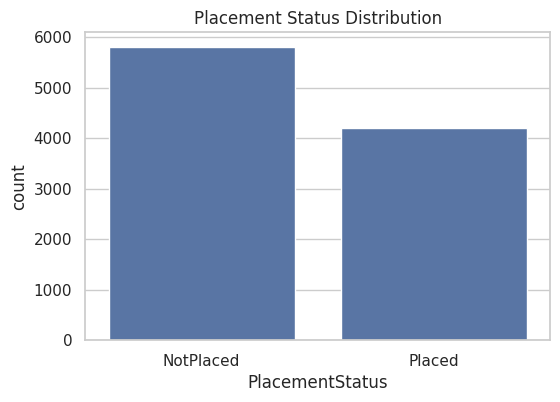

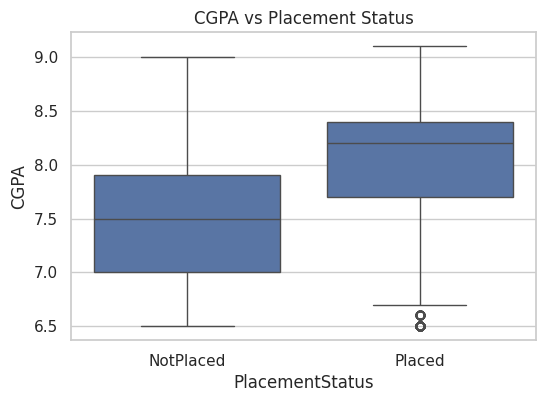

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 1. Placement Status Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PlacementStatus')
plt.title("Placement Status Distribution")
plt.show()

# 2. CGPA vs Placement
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='PlacementStatus', y='CGPA')
plt.title("CGPA vs Placement Status")
plt.show()



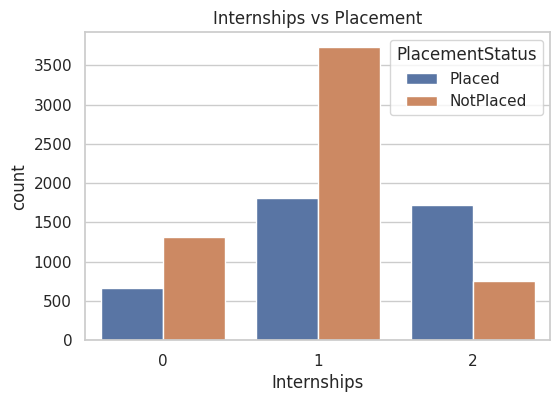

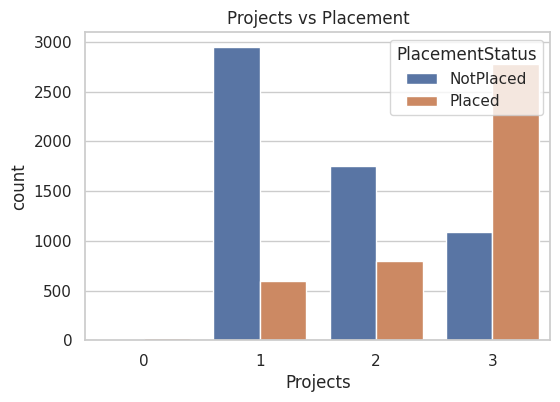

In [53]:
# 3. Internships vs Placement
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Internships', hue='PlacementStatus')
plt.title("Internships vs Placement")
plt.show()

# 4. Projects vs Placement
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Projects', hue='PlacementStatus')
plt.title("Projects vs Placement")
plt.show()



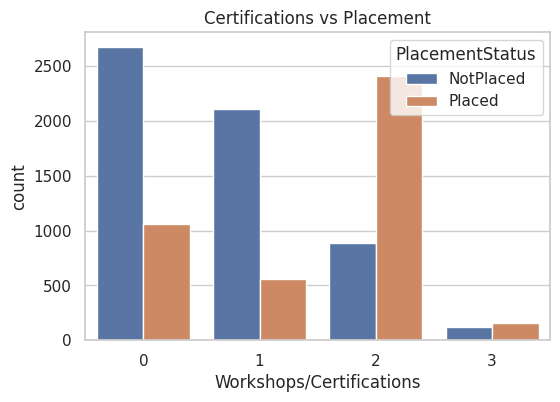

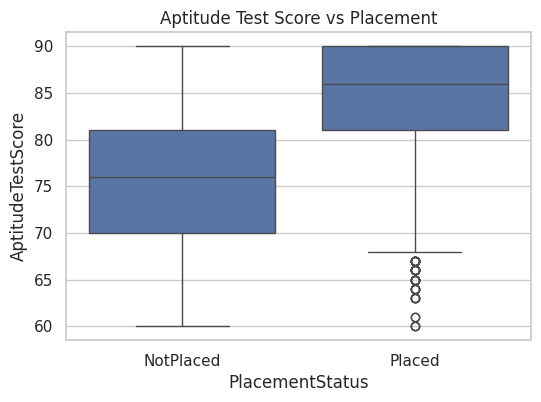

In [54]:

# 5. Certifications vs Placement
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Workshops/Certifications', hue='PlacementStatus')
plt.title("Certifications vs Placement")
plt.show()

# 6. Aptitude Score vs Placement
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='PlacementStatus', y='AptitudeTestScore')
plt.title("Aptitude Test Score vs Placement")
plt.show()


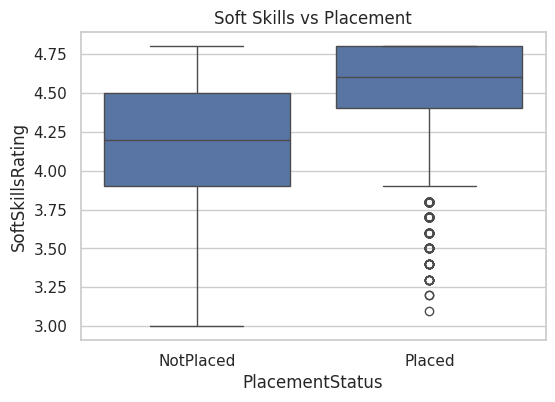

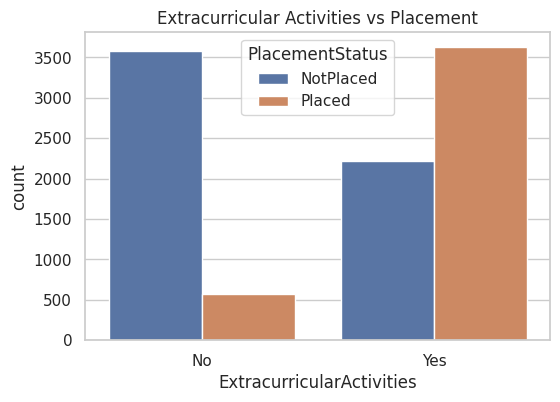

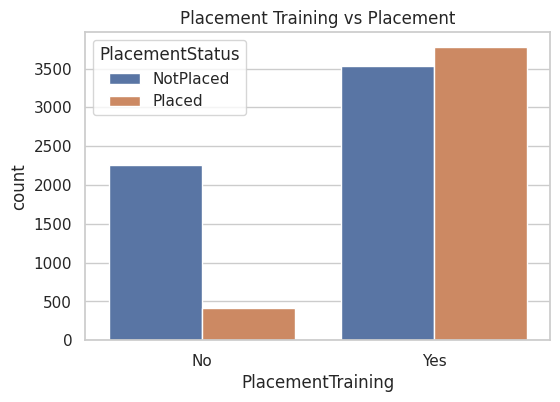

In [55]:

# 7. Soft Skills vs Placement
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='PlacementStatus', y='SoftSkillsRating')
plt.title("Soft Skills vs Placement")
plt.show()

# 8. Extracurricular Activities vs Placement
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='ExtracurricularActivities', hue='PlacementStatus')
plt.title("Extracurricular Activities vs Placement")
plt.show()

# 9. Placement Training vs Placement
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PlacementTraining', hue='PlacementStatus')
plt.title("Placement Training vs Placement")
plt.show()


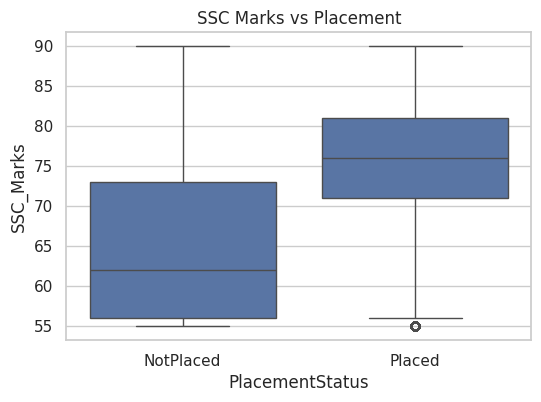

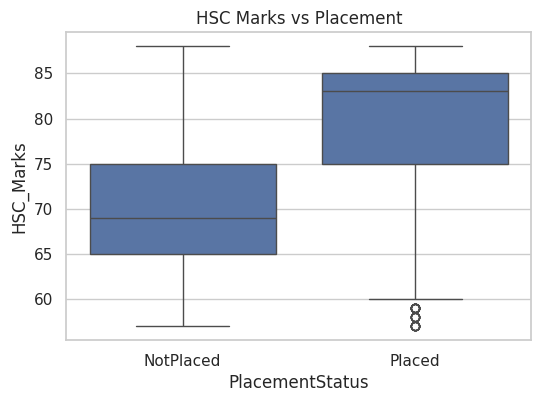

In [56]:

# 10. SSC Marks vs Placement
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='PlacementStatus', y='SSC_Marks')
plt.title("SSC Marks vs Placement")
plt.show()

# 11. HSC Marks vs Placement
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='PlacementStatus', y='HSC_Marks')
plt.title("HSC Marks vs Placement")
plt.show()




 >**streamlit**

In [26]:
!pip install streamlit --quiet
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [27]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import os

st.title("🎓 Placement Prediction App")
st.write("Enter the student's details below to predict placement outcome.")

# Load model and scaler
model_path = "model.joblib"
scaler_path = "scaler.joblib"

if not os.path.exists(model_path) or not os.path.exists(scaler_path):
    st.error("Model or scaler file not found. Please ensure both 'model.joblib' and 'scaler.joblib' are in the same directory.")
    st.stop()

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

# Input fields
cgpa = st.number_input("CGPA", min_value=0.0, max_value=10.0, step=0.01)
internship = st.number_input("Number of Internships", min_value=0.0, max_value=5.0, step=1.0)
projects = st.number_input("Number of Projects", min_value=0.0, max_value=5.0, step=1.0)
certifications = st.number_input("Workshops/Certifications", min_value=0, max_value=5, step=1)
aptitudetestscore = st.number_input("Aptitude Test Score", min_value=0, max_value=100, step=1)
softskillrating = st.number_input("Soft Skill Rating", min_value=0.0, max_value=5.0, step=0.1)
extracurricular_activities = st.selectbox("Extracurricular Activities", ["No", "Yes"])
placement_training = st.selectbox("Placement Training Attended", ["No", "Yes"])
ssc_percentage = st.number_input("SSC Percentage", min_value=0.0, max_value=100.0, step=0.1)
hsc_percentage = st.number_input("HSC Percentage", min_value=0.0, max_value=100.0, step=0.1)

# Convert categorical inputs
placement_training = 1 if placement_training == "Yes" else 0
extracurricular_activities = 1 if extracurricular_activities == "Yes" else 0

# Prepare input DataFrame
input_data = pd.DataFrame({
    'CGPA': [cgpa],
    'Internships': [internship],
    'Projects': [projects],
    'Workshops/Certifications': [certifications],
    'AptitudeTestScore': [aptitudetestscore],
    'SoftSkillsRating': [softskillrating],
    'ExtracurricularActivities': [extracurricular_activities],
    'PlacementTraining': [placement_training],
    'SSC_Marks': [ssc_percentage],
    'HSC_Marks': [hsc_percentage]
})


# Apply the same scaling as training
input_scaled = scaler.transform(input_data)

# Prediction
if st.button("Predict Placement"):
    try:
        prediction = model.predict(input_scaled)
        result = "✅ The student is *placed*." if prediction[0] == 1 else "❌ The student is *not placed*."
        st.success(result)

        # Optional: Show input data
        st.subheader("Entered Details")
        st.dataframe(input_data)

    except Exception as e:
        st.error(f"Prediction failed: {e}")



Writing app.py


In [28]:
!npm install -g localtunnel
!npm install -g npm@latest

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 5s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
removed 9 packages, and changed 107 packages in 18s
⠹
⠹25 packages are looking for funding
⠹  run `npm fund` for details
⠹

In [29]:
!wget -q -O - ipv4.icanhazip.com

34.80.117.234


In [30]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.117.234:8501

⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://chilly-insects-lick.loca.lt
  Stopping...
  Stopping...
Exception ignored in atexit callback: <function shutdown at 0x794ebcec1800>
Traceback (most recent call last):
  File "/usr/lib/python3.11/logging/__init__.py", line 2185, in shutdown
  Stopping...
  File "/usr/lib/python3.11/logging/__init__.py", line 989, in flush
    def flush(self):

  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 43, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/server/server.py", line 458, in stop
    self._runtime.stop()
  File "/usr/local/lib/python3.11/dist-packages/streamlit/runtime/runtime.py", line 324, in stop
    async_objs.eventloop.call_soon_threadsafe(stop_on_eventloop)
  File "/usr/lib/python3.11/as